In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
data = pd.read_excel("../connectomes/mouse.xlsx", sheet_name=None)

In [14]:
data.keys()

odict_keys(['W_ipsi', 'PValue_ipsi', 'W_contra', 'PValue_contra'])

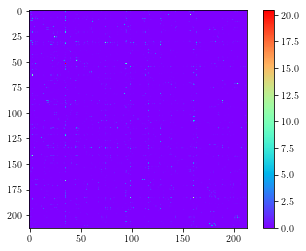

In [47]:
plt.imshow(data["W_ipsi"])
plt.colorbar()

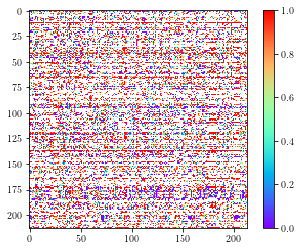

In [21]:
plt.imshow(data["PValue_ipsi"])
plt.colorbar()

In [7]:
data.describe()

,AAA,ACAd,ACAv,ACB,AD,AHN,AId,AIp,AIv,AMB,...,VISp,VISpl,VISpm,VM,VMH,VPL,VPM,VPMpc,VTA,XII
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.027542,0.059566,0.068843,0.283524,0.003818,0.050669,0.073604,0.033899,0.040047,0.002603,...,0.098670,0.009945,0.016292,0.027934,0.034961,0.015495,0.020791,0.006207,0.035415,0.006316
std,0.103277,0.218329,0.305676,1.064240,0.020064,0.208267,0.327430,0.120076,0.162320,0.010614,...,0.603920,0.063505,0.078254,0.071192,0.227229,0.042358,0.077966,0.023699,0.090854,0.049229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004625,0.002494,0.000759,0.017786,0.000281,0.004881,0.007029,0.003966,0.004516,0.000075,...,0.001451,0.000104,0.000543,0.021276,0.000483,0.000980,0.002013,0.000386,0.023704,0.000110
max,0.916373,2.031371,2.397819,8.892337,0.258398,1.833246,4.068048,1.388144,1.771689,0.109609,...,7.537316,0.718468,0.922775,0.491307,2.499306,0.288400,0.644428,0.270935,0.719755,0.704736


In [22]:
metadata = pd.read_excel("/Users/hmmitche/Downloads/nature13186-s2.xlsx", sheet_name=None)

In [29]:
m = metadata["Voxel Count_295 Structures"]
m = m.loc[m["Represented in Linear Model Matrix"] == "Yes"]

In [65]:
columns = []

In [66]:
for region in m["Major Region"].unique():
    [columns.append(acronym) for acronym in m.loc[m["Major Region"] == region, "Acronym"].values]

In [70]:
d.columns = columns

d.index = columns

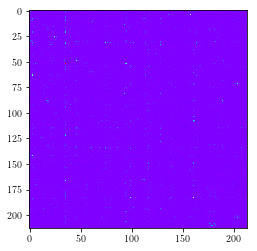

In [76]:
plt.imshow(d.values)

In [36]:
m["Major Region"].value_counts()

Isocortex                38
Thalamus                 35
Medulla                  25
Midbrain                 21
Hypothalamus             20
Pons                     13
Striatum                 12
Olfactory Areas          11
Hippocampal Formation    11
Cerebellar Cortex         9
Pallidum                  8
Cortical Subplate         7
Cerebellar Nuclei         3
Name: Major Region, dtype: int64

In [43]:
cortices = [[0, 38],
            [38, 73],
            [73, 98],
            [98, 119],
            [119, 139],
            [139, 152],
            [152, 164],
            [164, 175],
            [175, 186],
            [186, 195],
            [195, 203],
            [203, 210],
            [210, 213]]

In [48]:
d = data["W_ipsi"]

In [55]:
n = d.values/d.values.max()
cortex_mask = np.zeros_like(n)
for i, cortex in enumerate(cortices):
    cortex_mask[cortex[0]:cortex[1], cortex[0]:cortex[1]] += i
G1 = n.copy()
G1[cortex_mask == 0] = 0
G2 = n.copy()
G2[cortex_mask != 0] = 0
events = [lambda t_in, y_in, i=i: event(t_in, y_in, i) for i in range(n.shape[0])]
for e in events:
    e.direction = 1.0

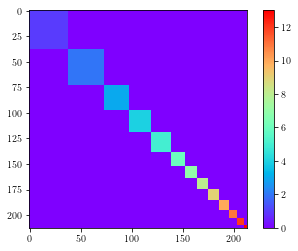

In [57]:
plt.imshow(cortex_mask)
plt.colorbar()